In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
car = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
car

engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                     170            3.0       159.0     3413.433759   
1                     130            5.0        97.0     3149.664934   
2                     170            NaN        78.0     3079.038997   
3                     220            4.0         NaN     2542.392402   
4                     210            1.0       140.0     3460.870990   
...                   ...            ...         ...             ...   
9699                  140            5.0       164.0     2981.107371   
9700                  180            NaN       154.0     2439.525729   
9701                  220            2.0       138.0     2583.471318   
9702                  230            4.0       177.0     2905.527390   
9703                  270            3.0       140.0     2908.043477   

      acceleration  model_year  origin fuel_type         drivetrain  \
0             17.7        2003  Europe  Gasoline    All-wheel drive   
1             17.8        2007     USA  Gasoline  Front-wheel drive   
2             15.1        2018  Europe  Gasoline  Front-wheel drive   
3             20.2        2009     USA    Diesel    All-wheel drive   
4             14.4        2009  Europe  Gasoline    All-wheel drive   
...            ...         ...     ...       ...                ...   
9699          17.3        2013  Europe    Diesel  Front-wheel drive   
9700          15.0        2004     USA  Gasoline    All-wheel drive   
9701          15.1        2008     USA    Diesel    All-wheel drive   
9702          19.4        2011     USA    Diesel  Front-wheel drive   
9703          14.7        2005    Asia    Diesel    All-wheel drive   

      num_doors  fuel_efficiency_mpg  
0           0.0            13.231729  
1           0.0            13.688217  
2           0.0            14.246341  
3           2.0            16.912736  
4           2.0            12.488369  
...         ...                  ...  
9699        NaN            15.101802  
9700        0.0            17.962326  
9701       -1.0            17.186587  
9702        1.0            15.331551  
9703       -1.0            14.884467  

[9704 rows x 11 columns]

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [4]:
car.describe()

engine_displacement  num_cylinders   horsepower  vehicle_weight  \
count          9704.000000    9222.000000  8996.000000     9704.000000   
mean            199.708368       3.962481   149.657292     3001.280993   
std              49.455319       1.999323    29.879555      497.894860   
min              10.000000       0.000000    37.000000      952.681761   
25%             170.000000       3.000000   130.000000     2666.248985   
50%             200.000000       4.000000   149.000000     2993.226296   
75%             230.000000       5.000000   170.000000     3334.957039   
max             380.000000      13.000000   271.000000     4739.077089   

       acceleration   model_year    num_doors  fuel_efficiency_mpg  
count   8774.000000  9704.000000  9202.000000          9704.000000  
mean      15.021928  2011.484027    -0.006412            14.985243  
std        2.510339     6.659808     1.048162             2.556468  
min        6.000000  2000.000000    -4.000000             6.200971  
25%       13.300000  2006.000000    -1.000000            13.267459  
50%       15.000000  2012.000000     0.000000            15.006037  
75%       16.700000  2017.000000     1.000000            16.707965  
max       24.300000  2023.000000     4.000000            25.967222

In [5]:
car.describe().T

count         mean         std          min  \
engine_displacement  9704.0   199.708368   49.455319    10.000000   
num_cylinders        9222.0     3.962481    1.999323     0.000000   
horsepower           8996.0   149.657292   29.879555    37.000000   
vehicle_weight       9704.0  3001.280993  497.894860   952.681761   
acceleration         8774.0    15.021928    2.510339     6.000000   
model_year           9704.0  2011.484027    6.659808  2000.000000   
num_doors            9202.0    -0.006412    1.048162    -4.000000   
fuel_efficiency_mpg  9704.0    14.985243    2.556468     6.200971   

                             25%          50%          75%          max  
engine_displacement   170.000000   200.000000   230.000000   380.000000  
num_cylinders           3.000000     4.000000     5.000000    13.000000  
horsepower            130.000000   149.000000   170.000000   271.000000  
vehicle_weight       2666.248985  2993.226296  3334.957039  4739.077089  
acceleration           13.300000    15.000000    16.700000    24.300000  
model_year           2006.000000  2012.000000  2017.000000  2023.000000  
num_doors              -1.000000     0.000000     1.000000     4.000000  
fuel_efficiency_mpg    13.267459    15.006037    16.707965    25.967222

In [6]:
car.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [7]:
car.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [8]:
numerical_variables = ['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'num_doors', 'fuel_efficiency_mpg']
numerical_variables

['engine_displacement',
 'num_cylinders',
 'horsepower',
 'vehicle_weight',
 'acceleration',
 'model_year',
 'num_doors',
 'fuel_efficiency_mpg']

In [9]:
import matplotlib.pyplot as plt

<Axes: >

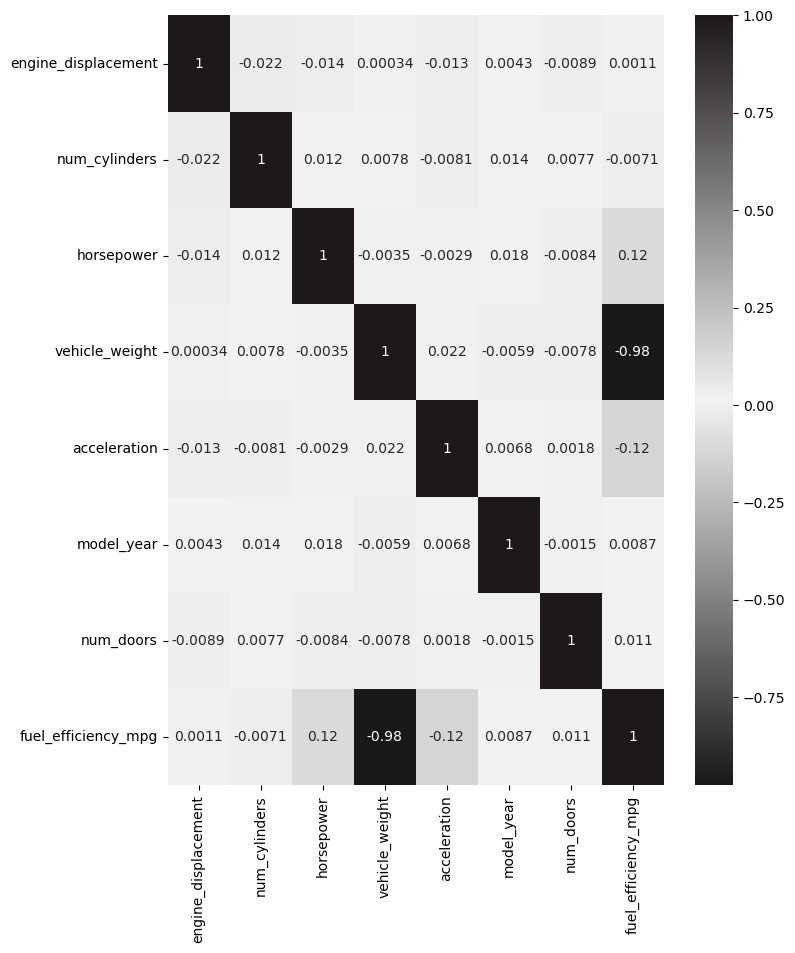

In [10]:
data = numerical_variables
fig = plt.figure(figsize = (8, 10))
cmap = sns.diverging_palette(160, 20, s= 8, l = 9, n = 8, as_cmap = True)
sns.heatmap(car[data].corr(), annot = True, cmap = cmap)

In [11]:
car.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [12]:
car.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [13]:
X = pd.get_dummies(car[["origin", "fuel_type", "drivetrain"]],drop_first = True)
y = car["fuel_efficiency_mpg"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

In [17]:
def rmse(y, y_test):
    error = (y - y_pred)**2
    mean = error.mean()
    return np.sqrt(mean)

In [18]:
rmse(y_test, y_pred)

np.float64(2.5387755878210734)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"the mean_squared_error of this value, {mean_squared_error(y_test, y_pred)}")
print(f"the r2_score of the value provided in this equation, {r2_score(y_test, y_pred)}")

the mean_squared_error of this value, 6.445381485316236
the r2_score of the value provided in this equation, -0.0009070587628186022


In [20]:
w = lr.coef_

In [21]:
w

array([-0.04726184,  0.05832674,  0.02003884, -0.05724253])

In [22]:
w0 = lr.intercept_

In [23]:
w0

np.float64(15.010644957204896)